# Setup

In [1]:
#clone if you haven't cloned the yolov5 repository
#!git clone https://github.com/ultralytics/yolov5
%cd yolov5

#requirements installation
#!pip install -r requirements.txt

C:\Sinau\UAS\ML2\yolov5


In [20]:
import torch
import os
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output, display
import glob
import roboflow
from roboflow import Roboflow

location = os.getcwd()
print(location)

C:\Sinau\UAS\ML2\yolov5


In [3]:
print(f'setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else "CPU"})')

setup complete. Using torch 2.3.1+cpu (CPU)


In [4]:
# Set up Roboflow
rf = Roboflow(model_format='yolov5', notebook='ultralytics')

RuntimeError: API Key is of Incorrect Type 
 Expected Type: <class 'str'>
 Input Type: <class 'NoneType'>

In [5]:
#set up envoriment
os.environ['dataset_directory'] = '../datasets'

In [6]:
# Download the dataset
rf = Roboflow(api_key="2ZCn6K3jRx5W5cLyB24S")
project = rf.workspace("abc-qqksz").project("electronic-ezdmf")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


# Train the YOLOv5 Model

In [11]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=C:\Sinau\UAS\ML2\datasets\Electronic-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-321-g3742ab49 Python-3.11.9 torch-2.3.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1

# Show training results

In [12]:
# start tensorboard
#logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18392), started 1:28:12 ago. (Use '!kill 18392' to kill it.)

# Predictions

In [17]:
!python detect.py --weights {location}/runs/train/exp3/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images 

detect: weights=['C:\\Sinau\\UAS\\ML2\\yolov5/runs/train/exp3/weights/best.pt'], source=C:\Sinau\UAS\ML2\datasets\Electronic-1/valid/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-321-g3742ab49 Python-3.11.9 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/38 C:\Sinau\UAS\ML2\datasets\Electronic-1\valid\images\10k-ohm-resistor_0_jpg.rf.b4490ab74b109891de1f1c918a12dc88.jpg: 416x416 3 Resistors, 98.3ms
image 2/38 C:\Sinau\UAS\ML2\datasets\Electronic-1\valid\images\10k-ohm-resistor_10_jpg.rf.43148b7b011fef6b8131ac775c566eae.jpg: 416x416 1 Resi

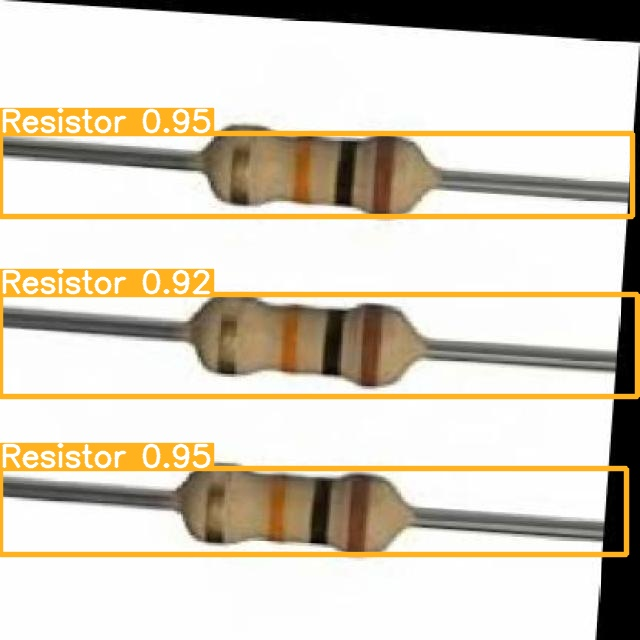

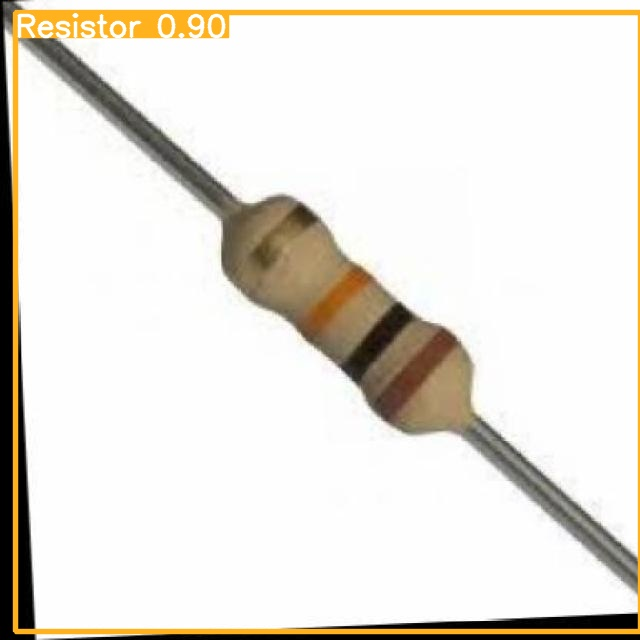

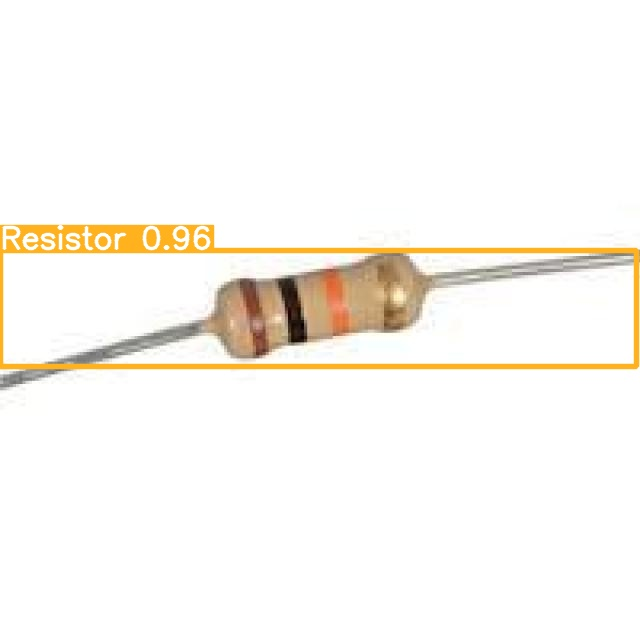

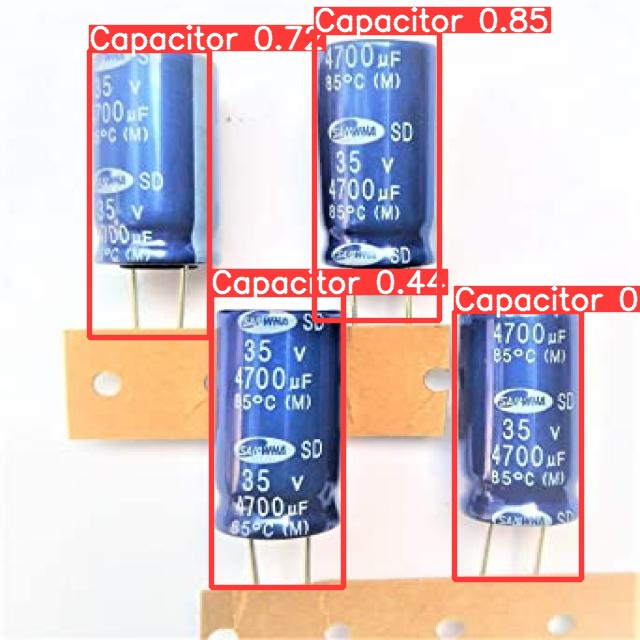

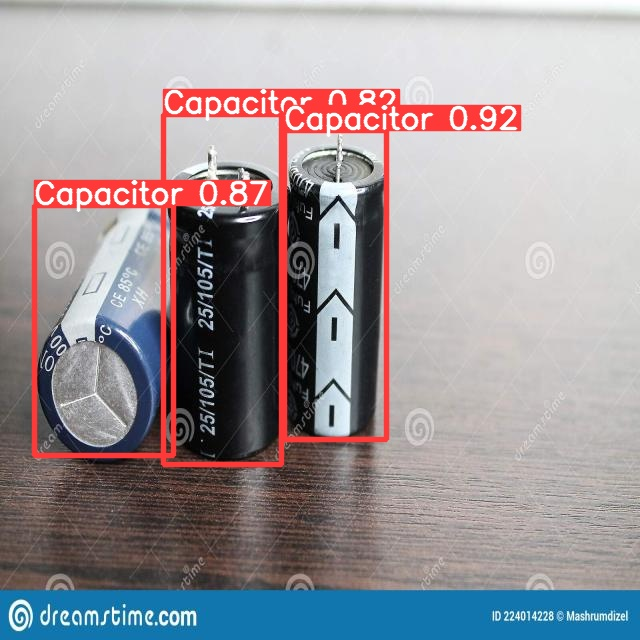

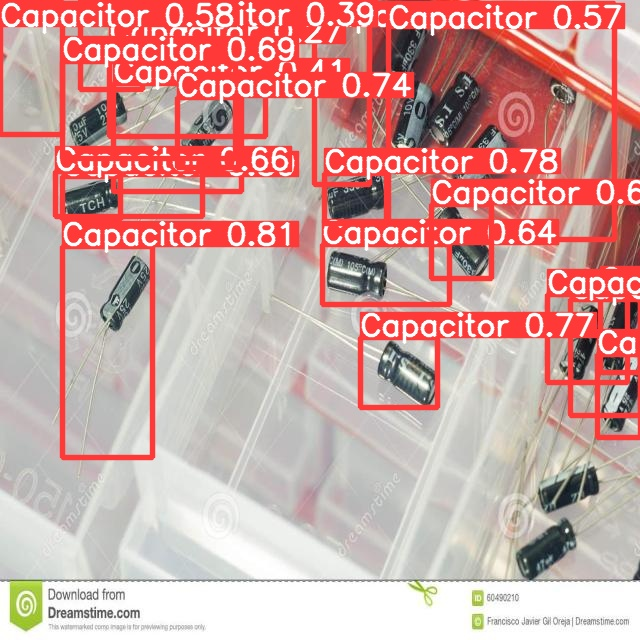

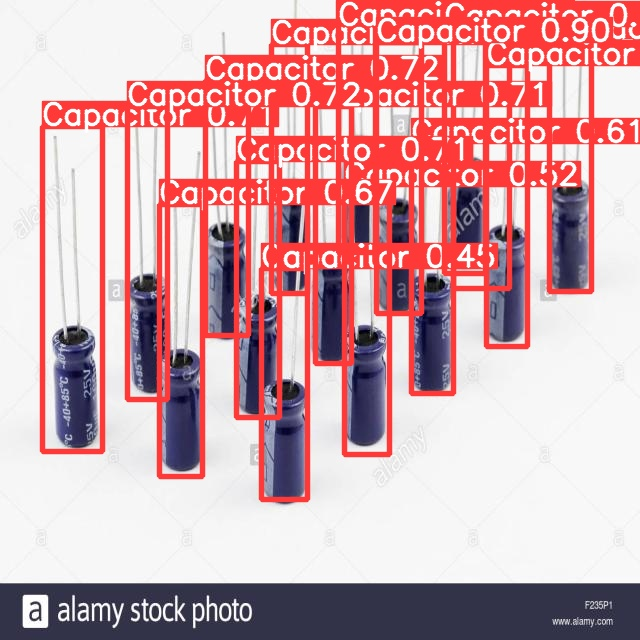

In [19]:
i = 0

for imageName in glob.glob(f'{location}/runs/detect/exp11/*.jpg'):
    i += 1
    
    if i < 8:
        display(Image(filename=imageName))
        print("\n")